In [14]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

In [62]:
df = pd.ExcelFile('netflix.xlsx').parse('netflix')
imdb = pd.read_csv('imdb.csv')

In [3]:
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [63]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [26]:
df.rating.value_counts()


TV-14       234
PG          170
TV-MA       148
G           138
TV-Y         68
TV-PG        59
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NR           14
UR            1
Name: rating, dtype: int64

In [44]:
df['release year'].value_counts()

2016    292
2015    109
2017    100
2014     58
2013     57
2012     45
1997     28
1998     26
2008     22
2011     21
2010     20
2009     20
2006     19
1999     19
2007     18
2000     17
2003     17
2002     15
2005     14
1993     14
2001     11
2004      8
1990      7
1995      6
1994      6
1982      6
1991      5
1986      4
1976      4
1940      3
1987      2
1989      2
1978      2
1992      2
1996      1
Name: release year, dtype: int64

In [35]:
df= df.dropna(subset=['user rating score'], inplace=True)
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

AttributeError: 'AxesSubplot' object has no attribute 'fig'

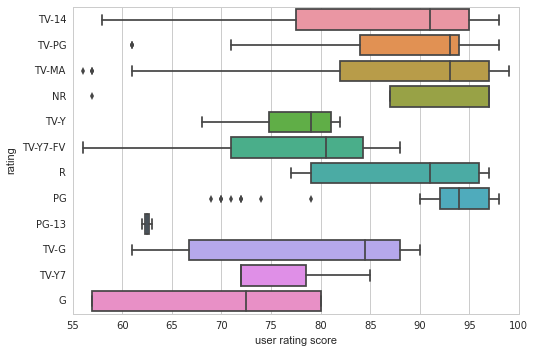

In [73]:
sns.boxplot(y="rating", x="user rating score", data=df[(df.rating<>'UR') & (df['release year']>=2012)]).fig.suptitle("Netflix rating")
#color by number of shows

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

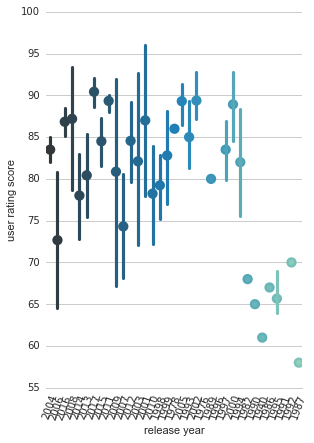

In [59]:
sns.factorplot(x='release year', y="user rating score",
               data=df[(df.rating<>'UR')], 
               capsize=.2, palette="YlGnBu_d", size=6, aspect=.75).despine(left=True)
plt.xticks(rotation=70)

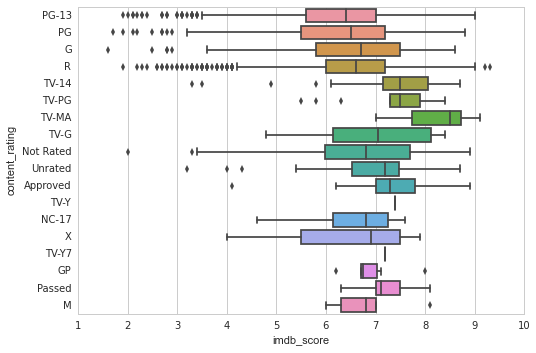

In [65]:
sns.boxplot(y = 'content_rating', x = 'imdb_score',  data = imdb)